## Sales Analysis

This is a hypothetical sales data of a company ABC Limited

### Importing libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing data

In [28]:
sales = pd.read_excel('sales.xlsx')

In [29]:
sales.head()

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1.0,3.0,2010-10-13,Low,6.0,261.5400,0.04,Regular Air,-213.2500,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,49.0,293.0,2012-10-01,High,49.0,10123.0200,0.07,Delivery Truck,457.8100,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02
2,50.0,293.0,2012-10-01,High,27.0,244.5700,0.01,Regular Air,46.7075,8.69,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03
3,80.0,483.0,2011-07-10,High,30.0,4965.7595,0.08,Regular Air,1198.9710,195.99,...,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,2011-07-12
4,85.0,515.0,2010-08-28,Not Specified,19.0,394.2700,0.08,Regular Air,30.9400,21.78,...,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30


### Data exploration and visualizaton

In [30]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                8399 non-null   float64       
 1   Order ID              8399 non-null   float64       
 2   Order Date            8399 non-null   datetime64[ns]
 3   Order Priority        8399 non-null   object        
 4   Order Quantity        8399 non-null   float64       
 5   Sales                 8399 non-null   float64       
 6   Discount              8399 non-null   float64       
 7   Ship Mode             8399 non-null   object        
 8   Profit                8399 non-null   float64       
 9   Unit Price            8399 non-null   float64       
 10  Shipping Cost         8399 non-null   float64       
 11  Customer Name         8399 non-null   object        
 12  Province              8399 non-null   object        
 13  Region            

In [31]:
# seems to have dates from 2009 to 2012
sales['Order Date'].value_counts()

2011-09-15    20
2012-03-28    20
2010-12-12    18
2010-04-20    17
2011-11-19    17
              ..
2010-01-27     1
2010-02-18     1
2012-07-01     1
2010-07-13     1
2009-02-09     1
Name: Order Date, Length: 1418, dtype: int64

In [32]:
# High standard deviation in sales, profit followed by unit price
# Mean of sales is 1775.87
sales.describe()

,Row ID,Order ID,Order Quantity,Sales,Discount,Profit,Unit Price,Shipping Cost,Product Base Margin
count,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8336.000000
mean,4200.000000,29965.179783,25.571735,1775.878179,0.049671,181.184422,89.346259,12.838557,0.512513
std,2424.726789,17260.883447,14.481071,3585.050525,0.031823,1196.653326,290.354383,17.264052,0.135589
min,1.000000,3.000000,1.000000,2.240000,0.000000,-14140.701600,0.990000,0.490000,0.350000
25%,2100.500000,15011.500000,13.000000,143.195000,0.020000,-83.315000,6.480000,3.300000,0.380000
50%,4200.000000,29857.000000,26.000000,449.420000,0.050000,-1.500000,20.990000,6.070000,0.520000
75%,6299.500000,44596.000000,38.000000,1709.320000,0.080000,162.748000,85.990000,13.990000,0.590000
max,8399.000000,59973.000000,50.000000,89061.050000,0.250000,27220.690000,6783.020000,164.730000,0.850000


In [33]:
sales.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Order Priority', 'Order Quantity',
       'Sales', 'Discount', 'Ship Mode', 'Profit', 'Unit Price',
       'Shipping Cost', 'Customer Name', 'Province', 'Region',
       'Customer Segment', 'Product Category', 'Product Sub-Category',
       'Product Name', 'Product Container', 'Product Base Margin',
       'Ship Date'],
      dtype='object')

In [10]:
# 21 columns (variables) by 8399 rows
sales.shape

(8399, 21)

In [11]:
# Missing values in the product base margin column
sales.isna().sum()

Row ID                   0
Order ID                 0
Order Date               0
Order Priority           0
Order Quantity           0
Sales                    0
Discount                 0
Ship Mode                0
Profit                   0
Unit Price               0
Shipping Cost            0
Customer Name            0
Province                 0
Region                   0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Name             0
Product Container        0
Product Base Margin     63
Ship Date                0
dtype: int64

In [12]:
sales['Product Base Margin'].dtype

dtype('float64')

In [13]:
sales.head(3)

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1.0,3.0,2010-10-13,Low,6.0,261.54,0.04,Regular Air,-213.2500,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,49.0,293.0,2012-10-01,High,49.0,10123.02,0.07,Delivery Truck,457.8100,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02
2,50.0,293.0,2012-10-01,High,27.0,244.57,0.01,Regular Air,46.7075,8.69,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03


In [37]:
# Adding month and year columns
import datetime
sales['Month'] = sales['Order Date'].dt.month
sales['Year'] = sales['Order Date'].dt.year

In [15]:
sales.head(4)

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date,Month,Year
0,1.0,3.0,2010-10-13,Low,6.0,261.5400,0.04,Regular Air,-213.2500,38.94,...,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20,10,2010
1,49.0,293.0,2012-10-01,High,49.0,10123.0200,0.07,Delivery Truck,457.8100,208.16,...,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02,10,2012
2,50.0,293.0,2012-10-01,High,27.0,244.5700,0.01,Regular Air,46.7075,8.69,...,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03,10,2012
3,80.0,483.0,2011-07-10,High,30.0,4965.7595,0.08,Regular Air,1198.9710,195.99,...,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,2011-07-12,7,2011


Text(0.5, 1.0, 'A Distribution Plot of Sales')

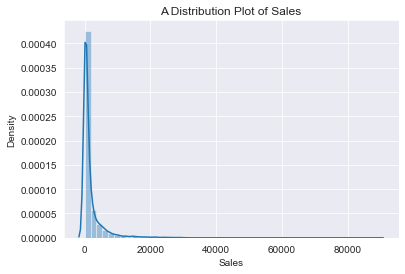

In [34]:
# Distribution plot of sales (positively skewed) - model may be able to predict well for sales below $20,000 than above
sns.distplot(sales['Sales'])
plt.title('A Distribution Plot of Sales')

Text(0.5, 1.0, 'Distribution Plot of Profits')

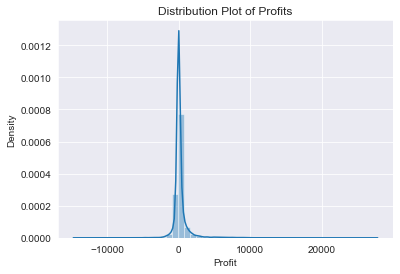

In [35]:
# Distribution of profit (normal distribution with some negative profits)
sns.distplot(sales['Profit'])
plt.title('Distribution Plot of Profits')

Text(0.5, 1.0, 'Scatter Plot of Sales by Profit')

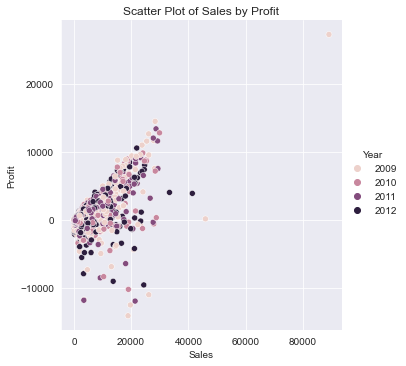

In [38]:
# Scatter plot of sales by profit - (outliers in 2009 of high profit and 2011 with some low profits)
sns.relplot(x = 'Sales',y= 'Profit', hue='Year', data=sales)
plt.title('Scatter Plot of Sales by Profit')

Text(0.5, 1.0, 'Scatter Plot of Sales by Profit')

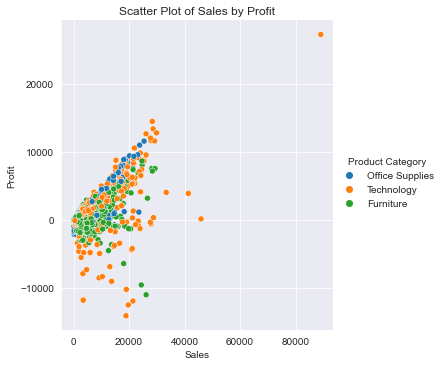

In [84]:
sns.relplot(x = 'Sales',y= 'Profit', hue='Product Category', data=sales)
plt.title('Scatter Plot of Sales by Profit')

Text(0.5, 1.0, 'Scatter Plot of Sales by Profit')

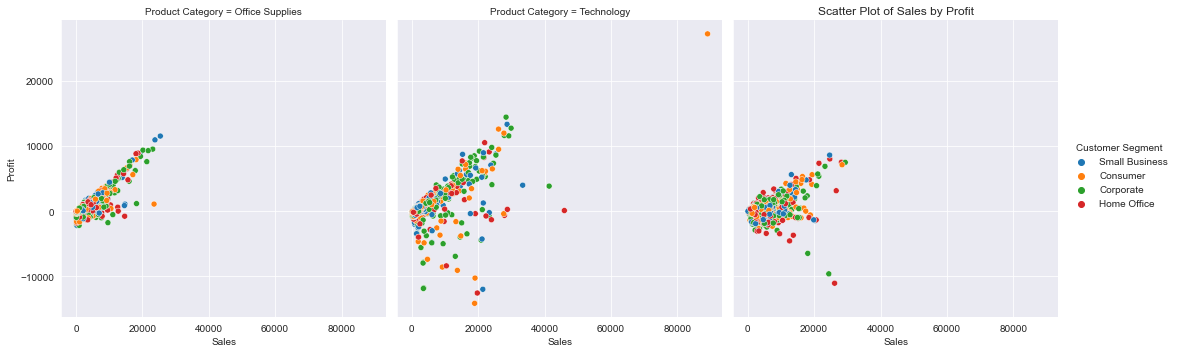

In [85]:
sns.relplot(x = 'Sales',y= 'Profit', hue='Customer Segment',col = 'Product Category',data=sales)
plt.title('Scatter Plot of Sales by Profit')

Text(0.5, 1.0, 'Scatter Plot of Sales by Profit')

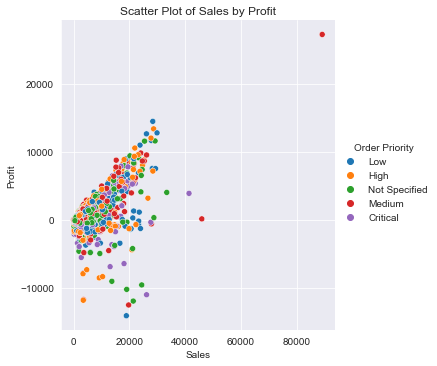

In [86]:
sns.relplot(x = 'Sales',y= 'Profit', hue='Order Priority', data=sales)
plt.title('Scatter Plot of Sales by Profit')

In [39]:
sales.head()

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date,Month,Year
0,1.0,3.0,2010-10-13,Low,6.0,261.5400,0.04,Regular Air,-213.2500,38.94,...,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20,10,2010
1,49.0,293.0,2012-10-01,High,49.0,10123.0200,0.07,Delivery Truck,457.8100,208.16,...,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02,10,2012
2,50.0,293.0,2012-10-01,High,27.0,244.5700,0.01,Regular Air,46.7075,8.69,...,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03,10,2012
3,80.0,483.0,2011-07-10,High,30.0,4965.7595,0.08,Regular Air,1198.9710,195.99,...,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,2011-07-12,7,2011
4,85.0,515.0,2010-08-28,Not Specified,19.0,394.2700,0.08,Regular Air,30.9400,21.78,...,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30,8,2010


In [40]:
sales.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Order Priority', 'Order Quantity',
       'Sales', 'Discount', 'Ship Mode', 'Profit', 'Unit Price',
       'Shipping Cost', 'Customer Name', 'Province', 'Region',
       'Customer Segment', 'Product Category', 'Product Sub-Category',
       'Product Name', 'Product Container', 'Product Base Margin', 'Ship Date',
       'Month', 'Year'],
      dtype='object')

Text(0.5, 6.799999999999994, 'Product Category')

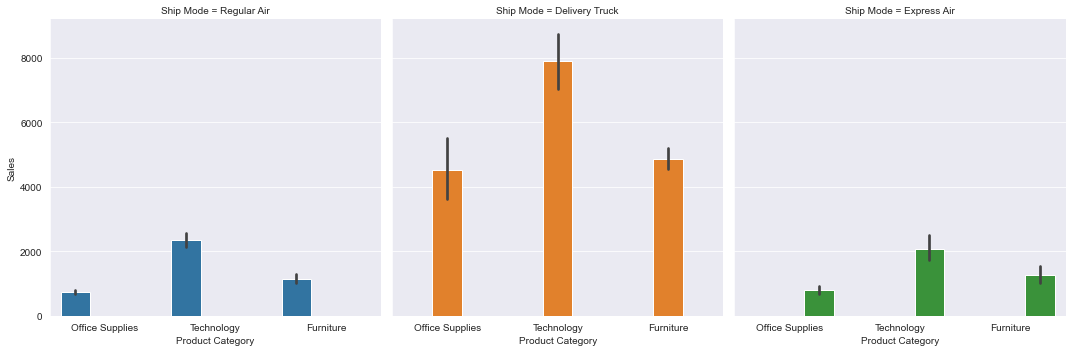

In [46]:
plt.rcParams['figure.figsize'] = (15,10)
sns.catplot(x = 'Product Category', y = 'Sales', kind = 'bar', hue='Ship Mode', col='Ship Mode',data = sales, col_wrap= 3)
plt.xlabel('Product Category')

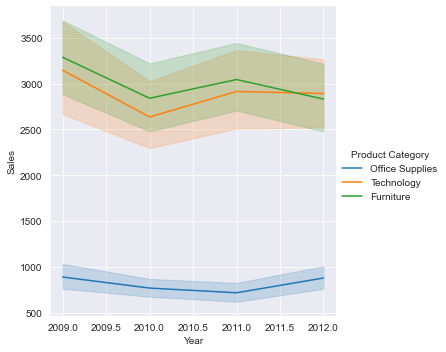

In [50]:
# Plot shows that offie supplies has had the lowest sales, furniture had more sales but was a bit lower in 2012
sns.relplot(x = 'Year', y = 'Sales', kind = 'line', hue = 'Product Category', data = sales)

In [51]:
sales['Customer Segment'].value_counts()

Corporate         3076
Home Office       2032
Consumer          1649
Small Business    1642
Name: Customer Segment, dtype: int64

Text(0.5, 19.799999999999983, 'Year')

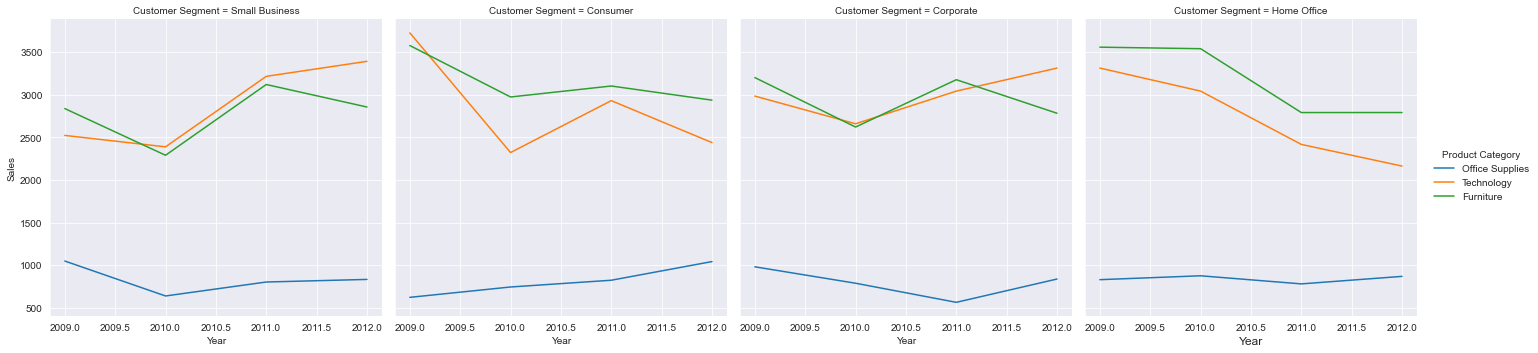

In [52]:
sns.relplot(x = 'Year', y = 'Sales', kind = 'line',col = 'Customer Segment', hue = 'Product Category', data = sales,col_wrap=4, ci = None)
plt.xlabel('Year', fontsize = 12)

In [54]:
sales.head(3)

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date,Month,Year
0,1.0,3.0,2010-10-13,Low,6.0,261.54,0.04,Regular Air,-213.2500,38.94,...,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20,10,2010
1,49.0,293.0,2012-10-01,High,49.0,10123.02,0.07,Delivery Truck,457.8100,208.16,...,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02,10,2012
2,50.0,293.0,2012-10-01,High,27.0,244.57,0.01,Regular Air,46.7075,8.69,...,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03,10,2012


In [56]:
sales['Region'].value_counts()

West                     1991
Ontario                  1826
Prarie                   1706
Atlantic                 1080
Quebec                    781
Yukon                     542
Northwest Territories     394
Nunavut                    79
Name: Region, dtype: int64

In [64]:
sales.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Order Priority', 'Order Quantity',
       'Sales', 'Discount', 'Ship Mode', 'Profit', 'Unit Price',
       'Shipping Cost', 'Customer Name', 'Province', 'Region',
       'Customer Segment', 'Product Category', 'Product Sub-Category',
       'Product Name', 'Product Container', 'Product Base Margin', 'Ship Date',
       'Month', 'Year'],
      dtype='object')

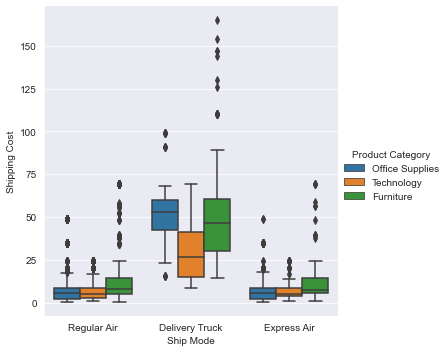

In [66]:
# Higher shiping cost for delivery truck, overall furniture seems to have higher shipping cost
sns.catplot(x = 'Ship Mode', y = 'Shipping Cost', hue = 'Product Category',kind = 'box',data = sales)

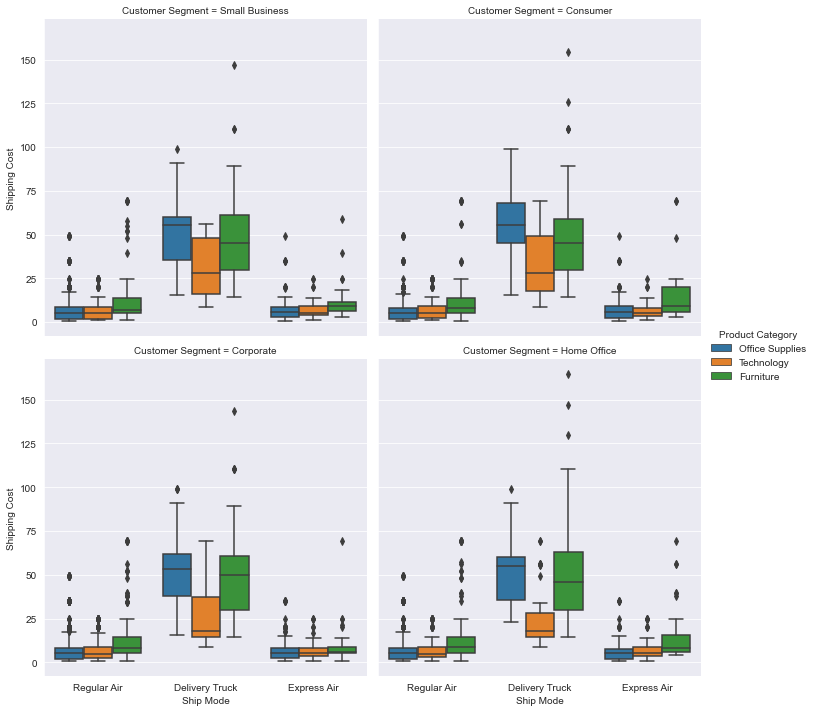

In [67]:
sns.catplot(x = 'Ship Mode', y = 'Shipping Cost', hue = 'Product Category',col = 'Customer Segment',kind = 'box',data = sales, col_wrap=2)

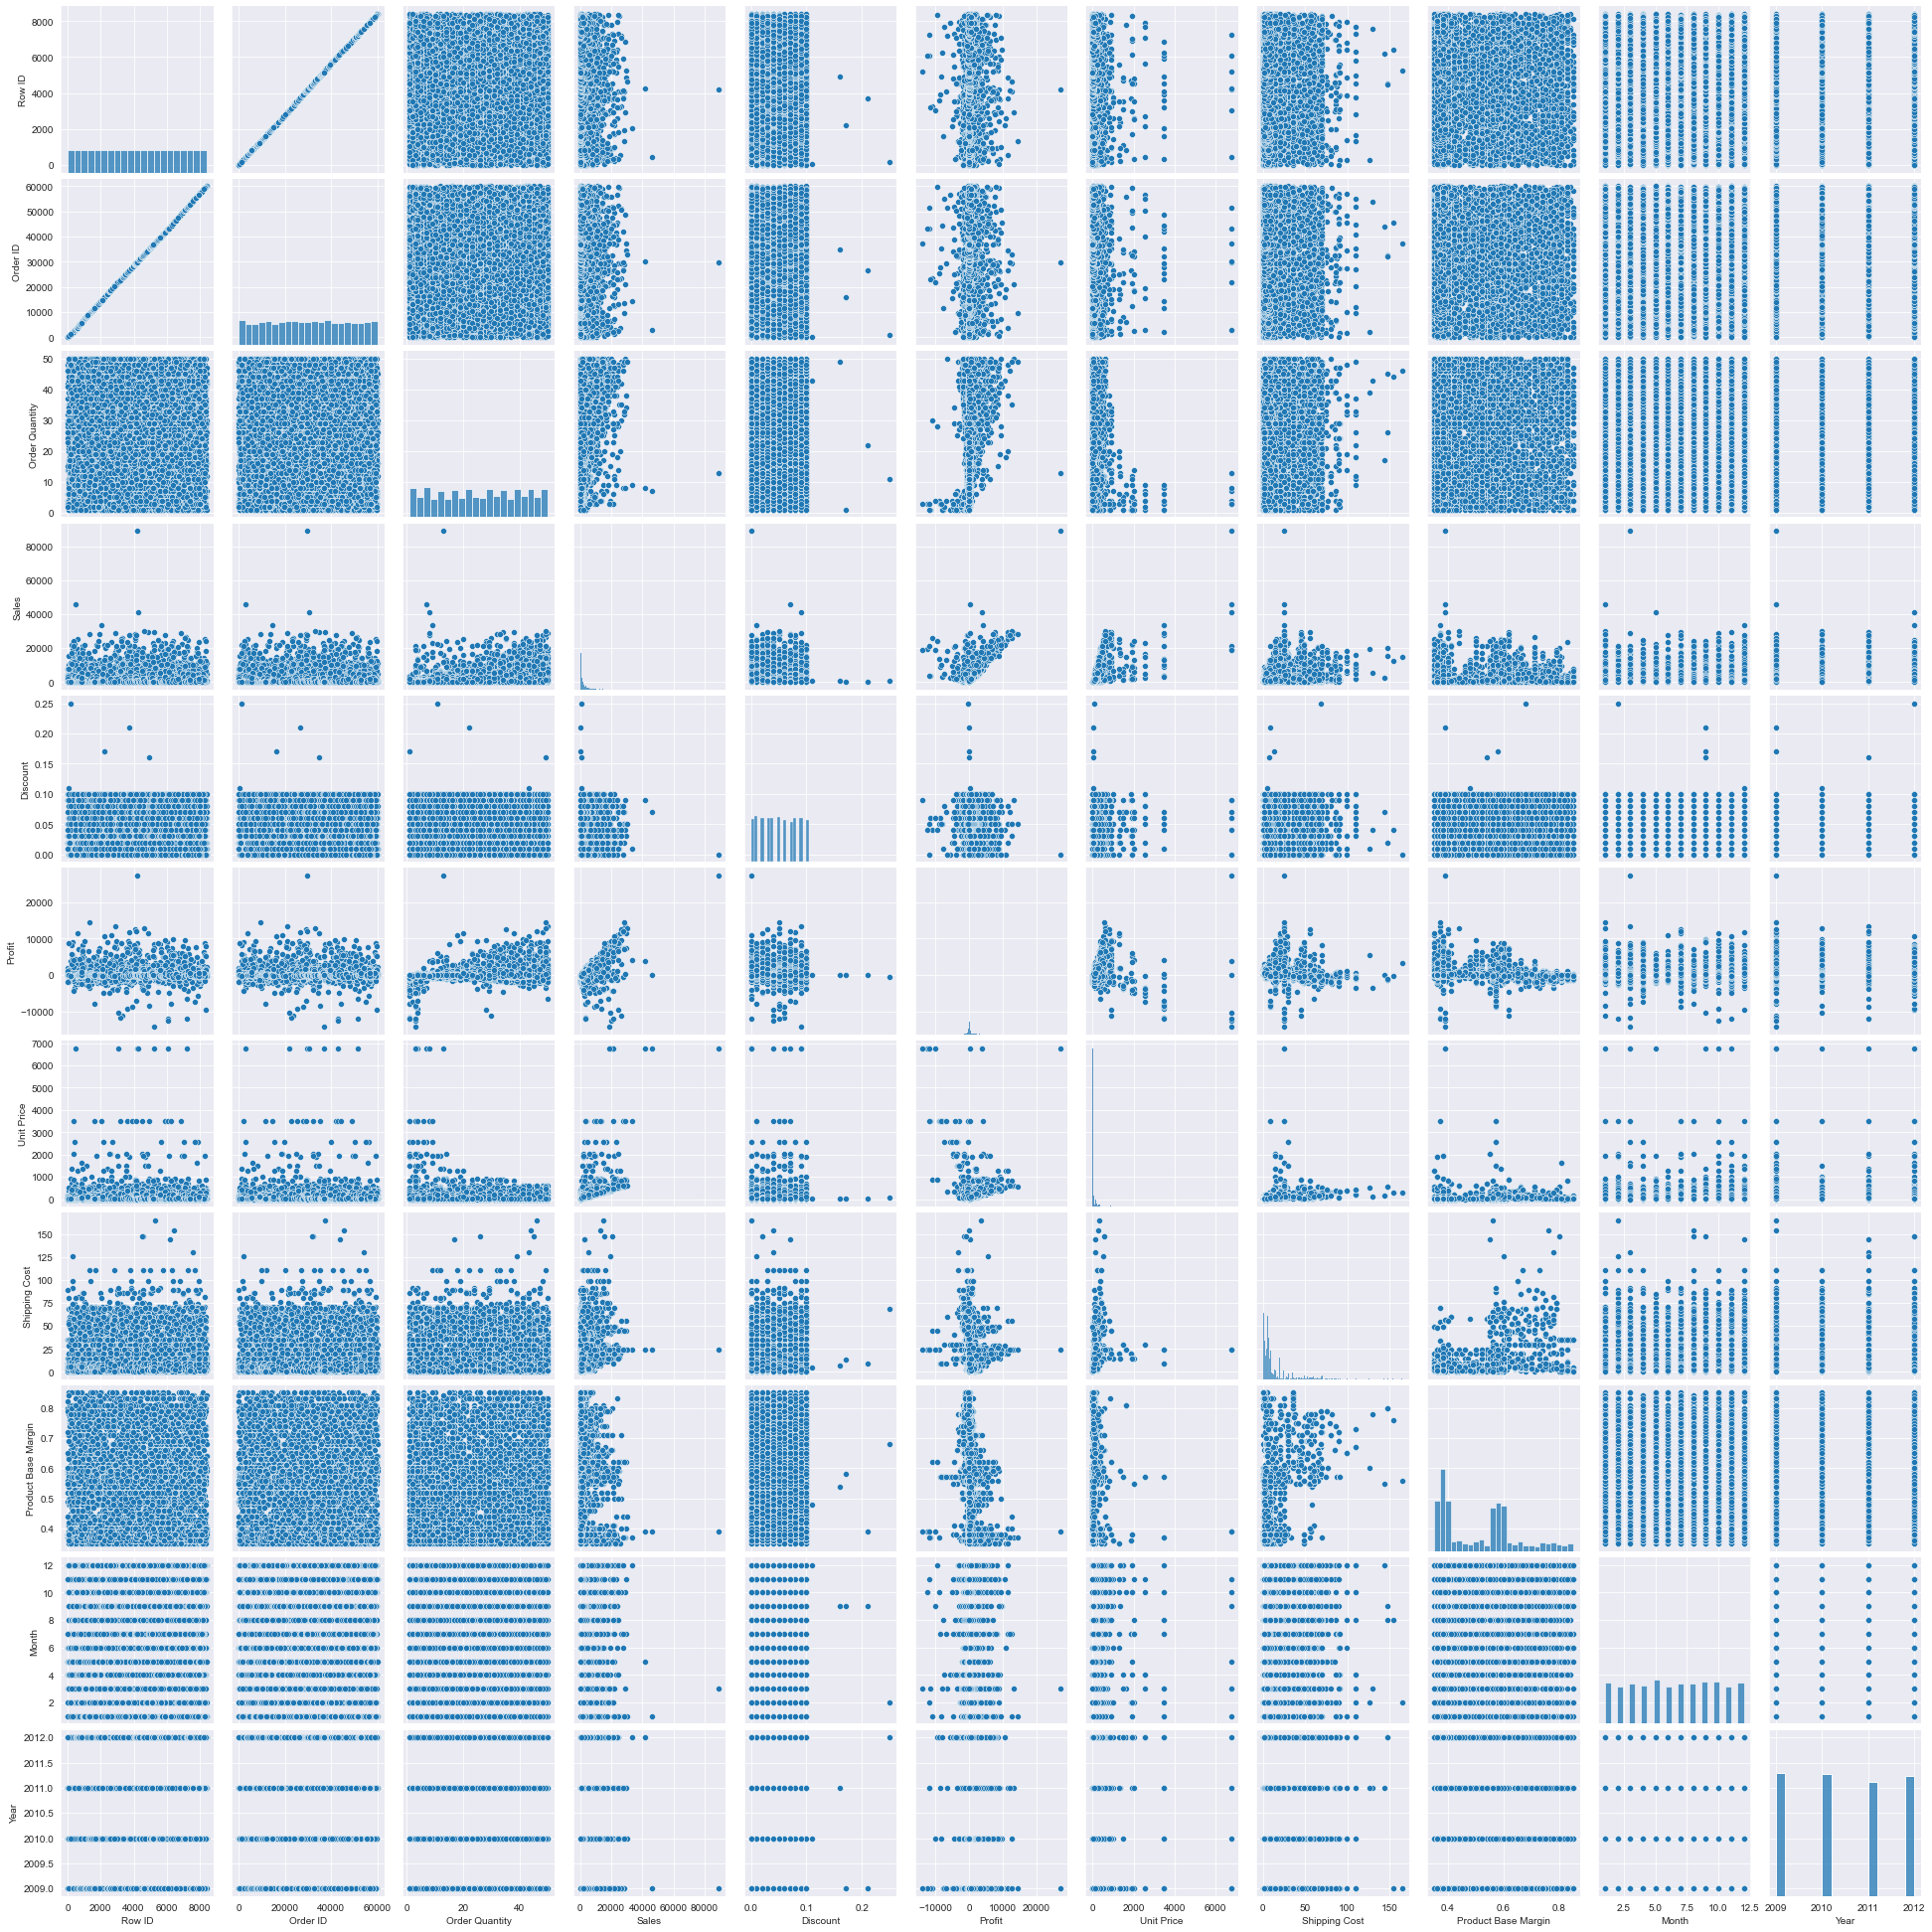

In [68]:
sns.pairplot(sales)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Nunavut'),
  Text(1, 0, 'Northwest Territories'),
  Text(2, 0, 'Atlantic'),
  Text(3, 0, 'Prarie'),
  Text(4, 0, 'West'),
  Text(5, 0, 'Ontario'),
  Text(6, 0, 'Quebec'),
  Text(7, 0, 'Yukon')])

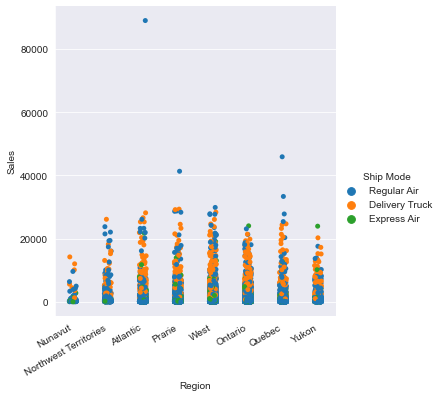

In [79]:
# Sales by region
sns.catplot('Region','Sales',hue = 'Ship Mode',data = sales)
plt.xticks(rotation = 30, ha = 'right')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Nunavut'),
  Text(1, 0, 'Northwest Territories'),
  Text(2, 0, 'Atlantic'),
  Text(3, 0, 'Prarie'),
  Text(4, 0, 'West'),
  Text(5, 0, 'Ontario'),
  Text(6, 0, 'Quebec'),
  Text(7, 0, 'Yukon')])

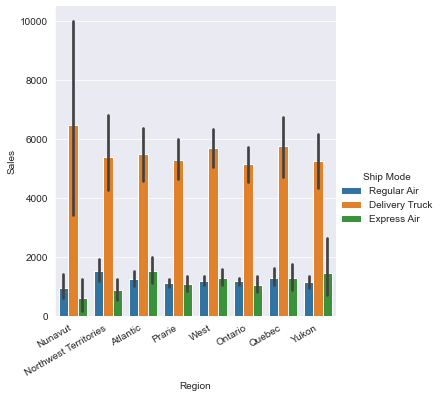

In [83]:
# Sales by region
sns.catplot('Region','Sales',hue = 'Ship Mode',kind = 'bar',data = sales)
plt.xticks(rotation = 30, ha = 'right')

<AxesSubplot:>

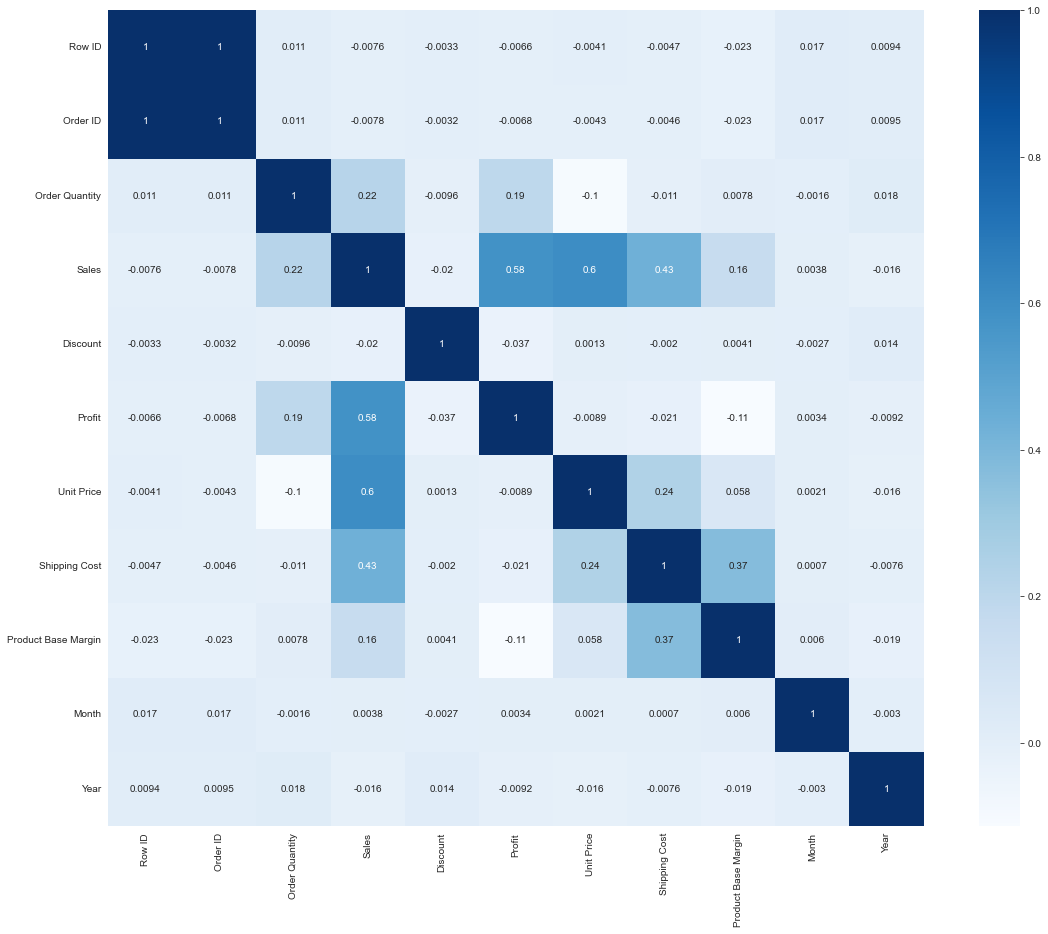

In [70]:
corelation = sales.corr(method = 'pearson')
sns.heatmap(corelation, mask = np.zeros_like(corelation,dtype = bool), cmap = 'Blues',square = True, annot= True)